<a href="https://colab.research.google.com/github/FRED984/Gym_FrozenLake_RL/blob/main/Frozen_Lake_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gym

Once you import gym you can load an environnement using the line gym.make("environnement")

In [ ]:
env = gym.make('FrozenLake-v1') # we want to use the FrozenLake environnement

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
print(env.observation_space.n) # get number of states
print(env.action_space.n) # get number of actions

16
4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
env.reset()#reset environnement to default state

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [ ]:
action = env.action_space.sample() #get a random action

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
observation, reward, done, info = env.step(action) #take action , notice it returns information about the

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [ ]:
env.render() # render the GUI for the environnement

/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


FROZEN LAKE ENVIRONEMENT

Buidling Q-Table

In [ ]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n
RENDER = False

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
Q= np.zeros((STATES , ACTIONS)) #create a matrix with all 0 value
Q

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

CONSTANTS

In [ ]:
EPISODES = 2000 # how many times to run the environnement from the beginning
MAX_STEPS = 100 # max number of steps allowed for each run of the environnement

LEARNING_RATE = 0.81 #learning rate
GAMMA = 0.96

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Picking an Action**
1.Randomly picking a valid action
2.Using the current Q-Table to find the best action

In [ ]:
epsilon = 0.9 #start with a 90% chance of picking a random  action

#code to pick  action
if np.random.uniform(0.1) < epsilon: #we will check if a randomly selected value is
  action = env.action_space.sample() #take random action
else:
  action = np.argmax(Q[state, :]) #use Q table to pick best action based on current

**Update Q Value**

In [ ]:
rewards = []
for episode in range(EPISODES):

  state= env.reset()
  for _ in range(MAX_STEPS):
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon :
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])
    next_state, reward, done, _ = env.step(action)
    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward+ GAMMA*np.max(Q[next_state, :])- Q[state, action])
    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break #reached the goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}")
# and now we can see our Q values!

[[2.94605515e-01 4.89375185e-02 5.04795675e-02 4.67022925e-02]
 [7.24218542e-03 4.80846972e-03 6.71752675e-04 3.77073717e-01]
 [1.43076342e-02 1.08319447e-02 1.39642514e-02 1.74249203e-01]
 [3.28898444e-03 9.91149981e-03 4.33396843e-03 1.10486005e-01]
 [2.72216463e-01 1.70766195e-02 1.19745089e-02 1.82798669e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.45320772e-02 2.74319264e-05 5.06887768e-05 1.76145838e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.58873809e-03 2.03332698e-02 5.16042659e-02 4.20689549e-01]
 [2.48843547e-02 5.71920800e-01 9.30096817e-03 1.91960758e-02]
 [8.92325285e-01 3.30794525e-03 4.15088638e-03 1.29224655e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.10359017e-02 3.57083343e-03 8.42053016e-01 3.09787255e-02]
 [1.18359471e-01 9.81208435e-01 1.20888771e-01 1.27506754e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

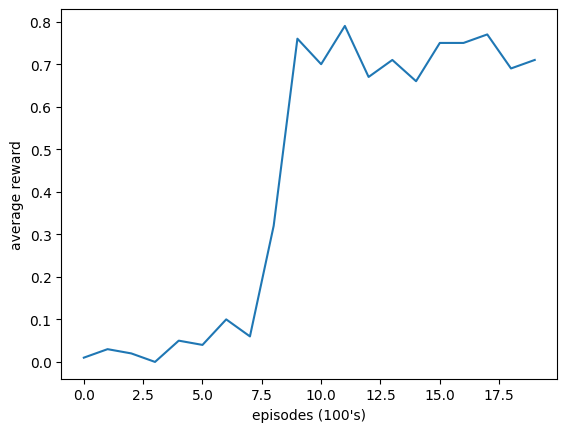

In [ ]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()